In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
file=pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S02W4953_hour.csv',header=0,delimiter='\t')
dwelling_id = 'P01S02W4953'
file.isnull().sum()
file=file.dropna()
file = file.set_index(pd.DatetimeIndex(file['datetime']))
file.head()
 

,datetime,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-05 11:00:00,2017-07-05 11:00:00,1470.556030,1389.960327,1475.128052,599.853027,0.000000,1604.250000,1238.140991,0.060059,294.700002,...,1018.250000,516.166667,0.0,6.037200,22.816667,24.983333,15.716667,63.833333,34483.333333,2.833333
2017-07-05 12:00:00,2017-07-05 12:00:00,1470.556152,1391.007935,1475.128052,599.853027,14.714286,596.379700,1238.201050,0.060059,300.549998,...,1018.233337,662.666667,0.0,6.960717,23.466667,25.400000,15.633334,61.166667,33350.000000,2.000000
2017-07-05 13:00:00,2017-07-05 13:00:00,1470.579590,1391.560547,1475.128052,599.853027,11.562675,801.231201,1238.204956,0.003906,285.750000,...,1018.216675,694.500000,0.0,5.372850,23.983333,26.283333,15.466667,58.500000,36666.666667,1.666667
2017-07-05 14:00:00,2017-07-05 14:00:00,1470.579956,1392.567749,1475.128052,599.853027,0.089636,960.882324,1238.204956,0.000000,294.550003,...,1018.250000,812.666667,0.0,9.047567,24.233333,27.116667,15.483333,57.833333,35400.000000,1.666667
2017-07-05 15:00:00,2017-07-05 15:00:00,1470.581055,1393.423828,1475.128052,599.853027,0.000000,837.653625,1238.208984,0.004028,311.250000,...,1018.366669,811.000000,0.0,9.430167,23.950000,26.583334,14.983333,56.833333,35000.000000,1.500000


In [32]:
GP = file['gasPower']
Q = file['Q']
T = file['T']
datetime = file['datetime']
eMeter=file['eMeter']
U=file['U']
N=file['N']

#datetime = file['datetime'].iloc[24:192].between_time('7:00', '23:00')




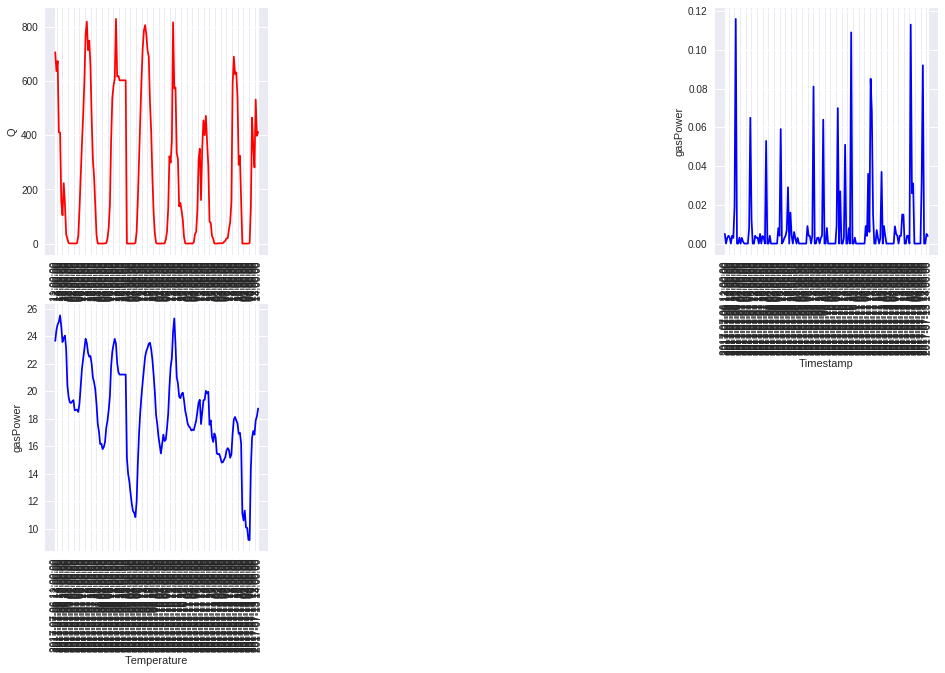

In [5]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(datetime,Q,'r')
plt.grid(True)
plt.ylabel('Q')
plt.xlabel('Timestamp')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.plot(datetime, GP,'b')
plt.grid(True)
plt.xlabel('Timestamp')
plt.ylabel('gasPower')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
plt.plot(datetime, T,'b')
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('gasPower')
plt.xticks(rotation=90)

fig.subplots_adjust(wspace=2)
plt.show()

In [6]:
slope,intercept, r_value,p_value, std_err=stats.linregress(Q,GP)

print('R-SQUARED Q/Gp 1 day:\n'+str((r_value**2)*100)+'%')


slope,intercept, r_value,p_value, std_err=stats.linregress(T,GP)

print('R-SQUARED T/Gp 1 day:\n'+str((r_value**2)*100)+'%')



R-SQUARED Q/Gp 1 day:
0.18640043245%
R-SQUARED T/Gp 1 day:
0.734683008029%


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
X = [T, Q, eMeter]
y = GP

X = np.array(X).reshape(-1,3) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
model.score(X_test, y_test)

0.17561622279355329

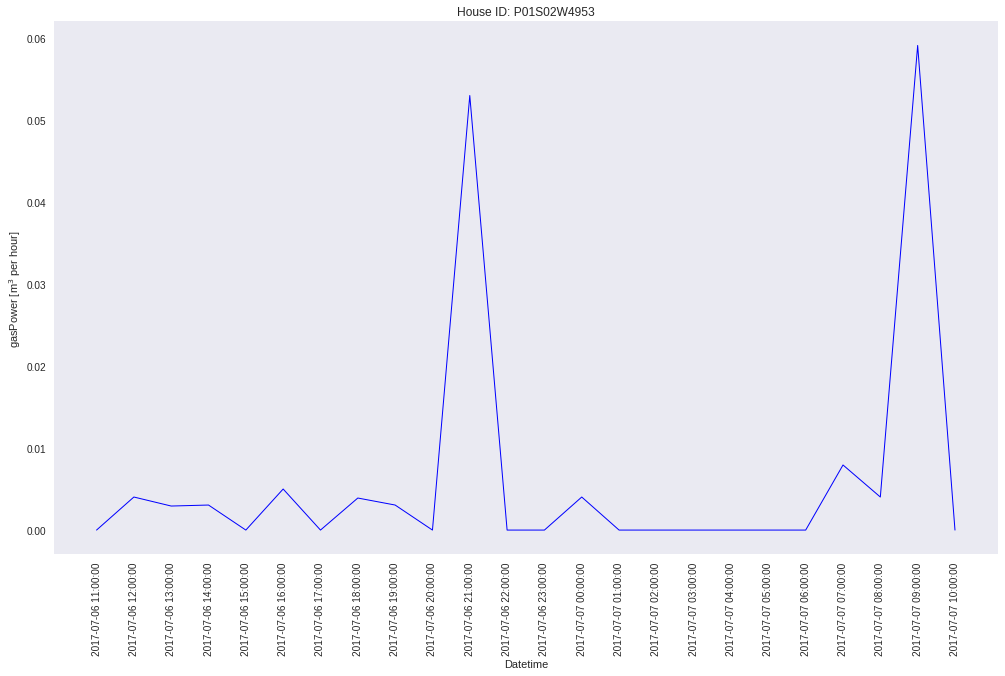

In [9]:
fig = plt.figure(figsize=(14, 8))
plt.plot(file['datetime'][24:48],file['gasPower'][48:72],'-',color='b',linewidth=1)
plt.grid()
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('House ID: P01S02W4953')
plt.xlabel('Datetime')
plt.ylabel('gasPower [m$^3$ per hour]')
plt.show()


# plt.title('House ID: P01S02W4953')

# plt.plot(df.index[24:48], df['gasPower'][48:72], '-', color='b', linewidth=1)
# plt.xlabel('Datetime')
# plt.ylabel('gasPower [m$^3$ per hour]')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# # plt.savefig('sample1.png', dpi=500)

# plt.show()

In [10]:
def create_corr_matrix(df, dwelling_id, annot):
    """
    Pearson correlation coefficient matrix. 
    The Pearson correlation coefficient is a measure of the linear correlation between two variables.
    """
    plt.clf()
    %matplotlib inline
    corr = df.corr()
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True

    if annot:
        fig, ax = plt.subplots(figsize=(25,25))
    else:
        fig, ax = plt.subplots()

    fig = sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=annot, ax=ax, 
                cbar_kws={'label':'Pearson correlation coefficient [-]'})

    fig.set_title('Correlation matrix of dwelling ID: '+dwelling_id)
    fig.tick_params(axis='x', rotation=90)
    fig.tick_params(axis='y', rotation=0)

    fig = fig.get_figure()
    fig.tight_layout()
    
    fig.show()
    
    return fig

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


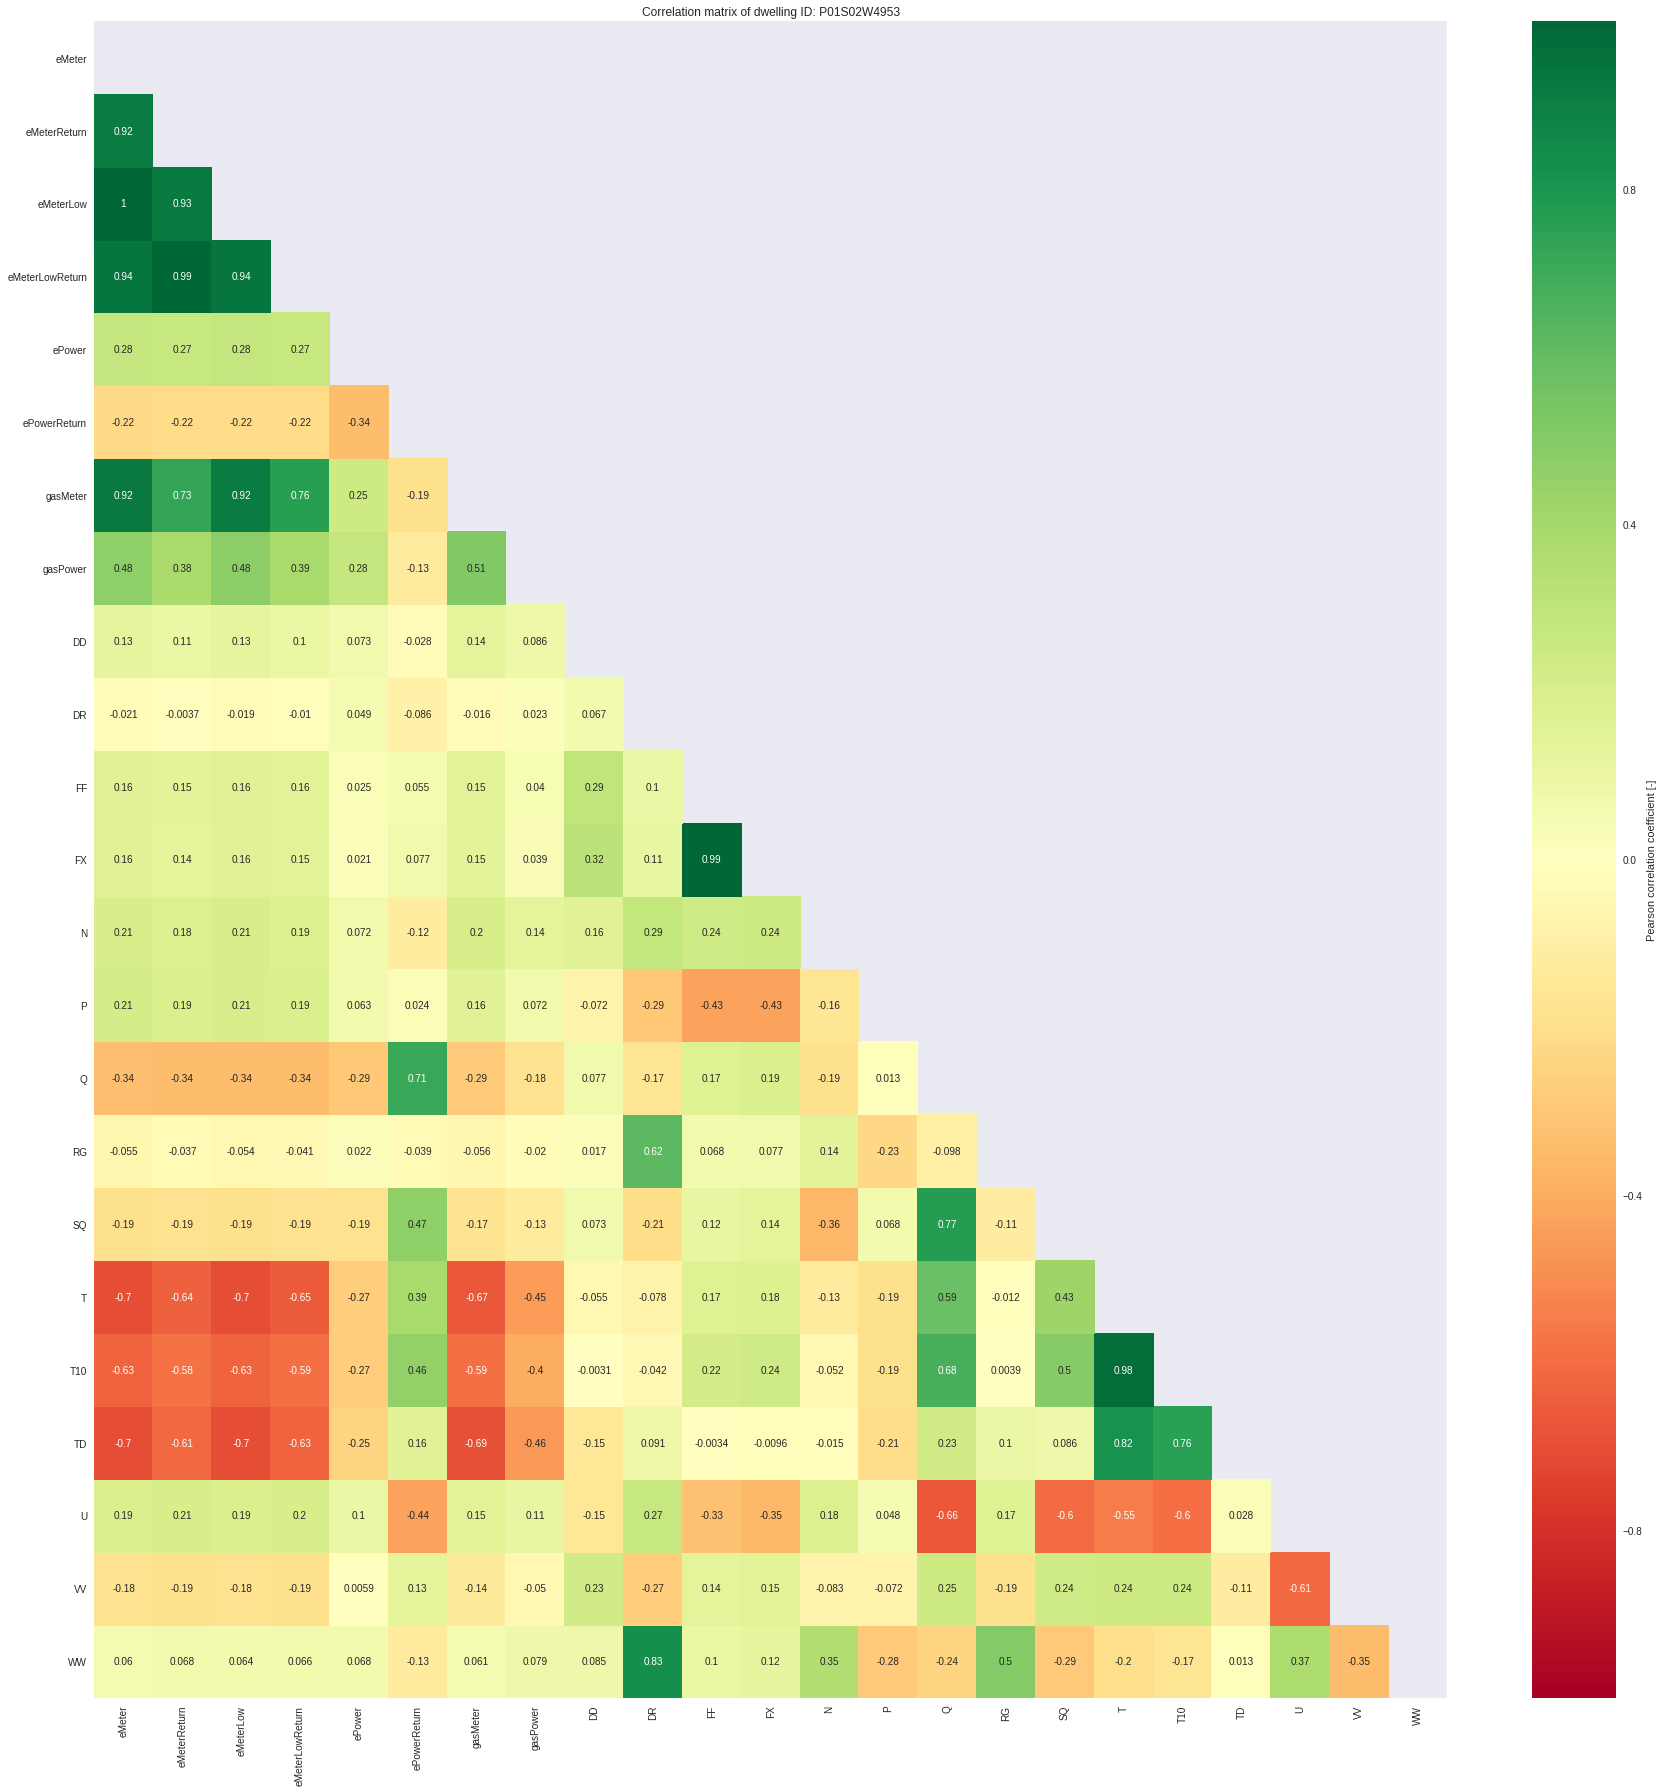

In [11]:
fig = create_corr_matrix(file, dwelling_id, True)